# Exercise 03 - Autoregressive Integrated Moving Average Models

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 03.1 - Plot the ACF and PACF of the 4 series in data_arma.csv
### Try to say to which AR or MA process each series belong

In [33]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
data = pd.read_csv('data_arma.csv',index_col=0)

In [34]:
#Revismos de Dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 4 columns):
ts1    500 non-null float64
ts2    500 non-null float64
ts3    500 non-null float64
ts4    500 non-null float64
dtypes: float64(4)
memory usage: 19.5 KB


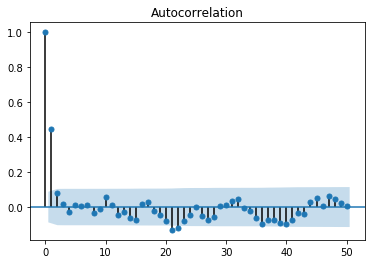

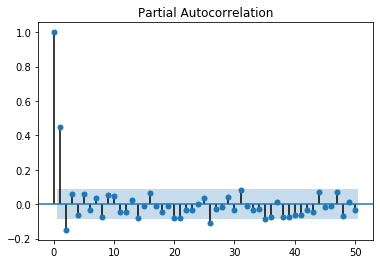

In [62]:
# Realizamos las graficas de Correlaciones
from statsmodels.graphics.tsaplots import plot_pacf
# Modelo MA orden 1
plot_acf(data.ts1, lags=50)
plot_pacf(data.ts1, lags=50);

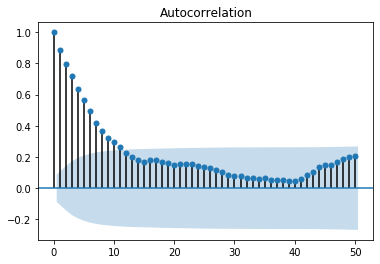

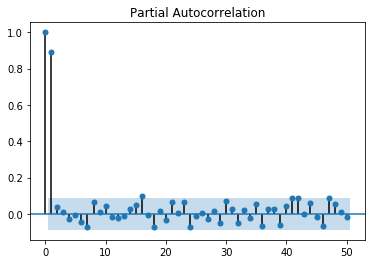

In [55]:
plot_acf(data.ts2, lags=50)# Modelo AR orden 1
plot_pacf(data.ts2, lags=50);

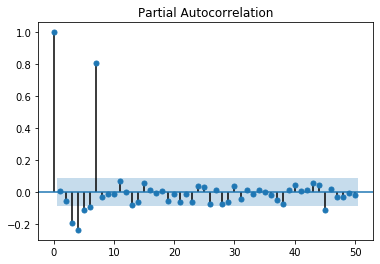

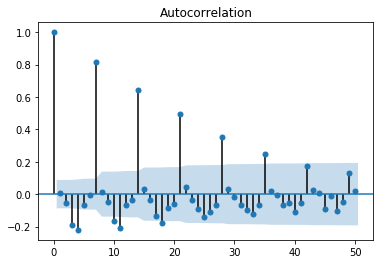

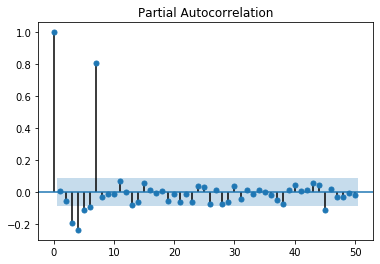

In [63]:

plot_acf(data.ts3, lags=50) # Modelo AR orden 7
plot_pacf(data.ts3, lags=50)

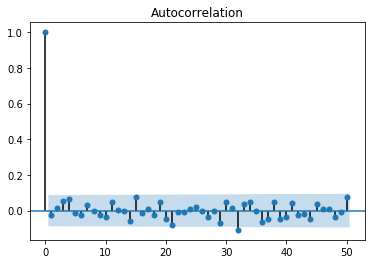

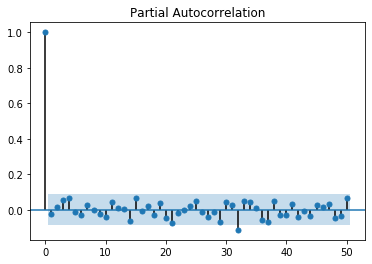

In [57]:
plot_acf(data.ts4, lags=50) # Modelo Random Walk
plot_pacf(data.ts4, lags=50);

# 03.2 - Using the shampoo dataset:
## Find the parameters p, d q that minimizes the mse of the rolling forecast


Los mejores parametros para minimizar

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


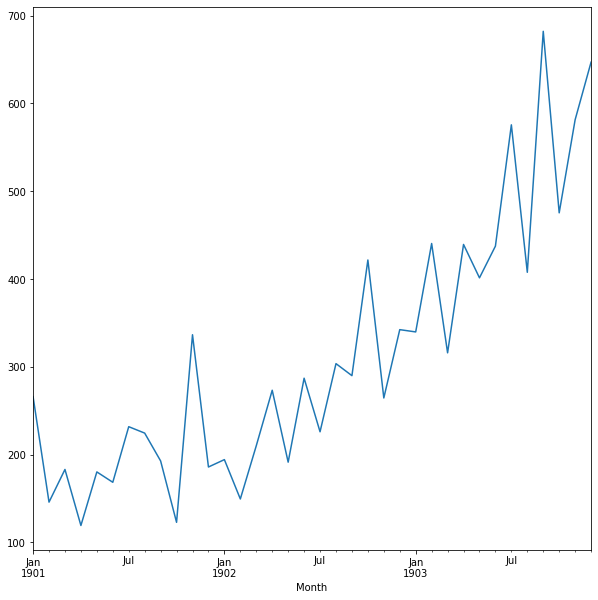

In [37]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot(figsize=(10, 10));

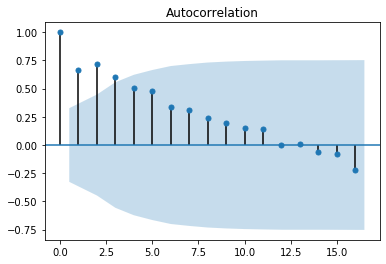

In [38]:
plot_acf(series);

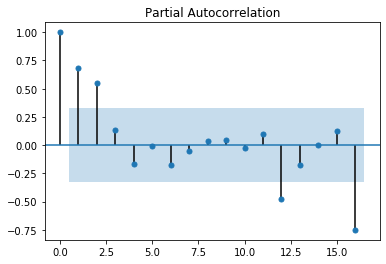

In [39]:
plot_pacf(series);

In [40]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary());

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -196.393
Method:                       css-mle   S.D. of innovations             64.746
Date:                Thu, 18 Jun 2020   AIC                            404.787
Time:                        18:46:36   BIC                            414.119
Sample:                    02-01-1901   HQIC                           408.008
                         - 12-01-1903            

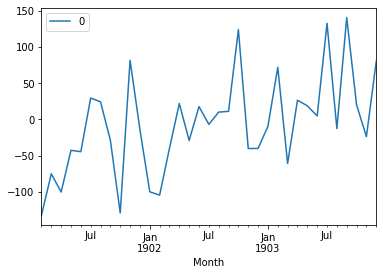

In [42]:
# plot residual errors

import matplotlib.pyplot as plt

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

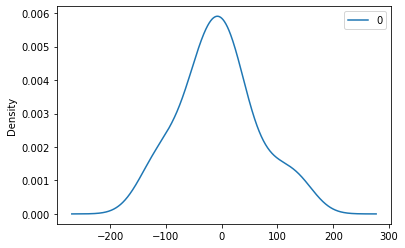

0
count   35.000000
mean    -6.169594
std     68.472391
min   -132.296365
25%    -41.338894
50%     -9.486228
75%     23.190171
max    140.529736


In [43]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [58]:

from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
 
# Se define esta funcion que genera un melo ARIMA, con los argumentos de un dataset y un orden(p,d,q)
def evaluate_arima_model(X, arima_order):
	# Se dividie el dataset en train y test
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# Se realizan las predicciones
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# Se calcula media del cuadrado del error
	error = mean_squared_error(test, predictions)
	# La funcion retorna el error
	return error
 
# Se define esta funcion que evalua varias combinaciones de p, d y q para un dataset y evalua sus correspondientes modelos ARIMA, y guarda el valor del orden que minimiza el MSE
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
p_values = range(0,10)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=52425.268
ARIMA(0, 0, 1) MSE=38145.141
ARIMA(0, 0, 2) MSE=23989.630
ARIMA(0, 1, 0) MSE=18003.173
ARIMA(0, 1, 1) MSE=9558.332
ARIMA(0, 2, 0) MSE=67339.808
ARIMA(0, 2, 1) MSE=18322.451
ARIMA(1, 0, 0) MSE=23112.957
ARIMA(1, 1, 0) MSE=7121.367
ARIMA(1, 1, 1) MSE=7003.683
ARIMA(1, 2, 0) MSE=18608.021
ARIMA(2, 0, 0) MSE=10183.361
ARIMA(2, 1, 0) MSE=5689.930
ARIMA(2, 1, 1) MSE=7759.705
ARIMA(2, 2, 0) MSE=9860.956
ARIMA(3, 0, 0) MSE=9543.161
ARIMA(3, 1, 0) MSE=6998.942
ARIMA(3, 1, 1) MSE=7145.875
ARIMA(3, 2, 0) MSE=10513.284
ARIMA(4, 1, 0) MSE=6649.593
ARIMA(4, 1, 1) MSE=6796.257
ARIMA(4, 2, 0) MSE=7596.332
ARIMA(4, 2, 1) MSE=4694.876
ARIMA(5, 0, 0) MSE=9419.910
ARIMA(5, 1, 0) MSE=6958.326
ARIMA(5, 1, 1) MSE=8096.921
ARIMA(5, 2, 0) MSE=6710.525
ARIMA(6, 1, 0) MSE=6810.073
ARIMA(6, 1, 1) MSE=4411.025
ARIMA(6, 2, 0) MSE=6261.121
ARIMA(7, 0, 0) MSE=7573.680
ARIMA(7, 1, 0) MSE=6523.855
ARIMA(8, 1, 0) MSE=6578.891
ARIMA(9, 1, 0) MSE=7299.600
Best ARIMA(6, 1, 1) MSE=4411.025


In [50]:
4411.025**0.5

66.41554787849002

Con esta metodología encontramos que el orden que mejor modela la serie de datos (minimizando el MSE) es (6,1,1)